In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def adf_test(data):
    n = len(data)
    delta_y = np.diff(data)
    delta_y_lagged = np.roll(delta_y, shift=1)
    delta_y_lagged[0] = 0
    
    X = np.column_stack((data[1:], delta_y_lagged))
    X = np.concatenate((np.ones((n-1, 1)), X), axis=1)
    
    beta = np.linalg.inv(X.T @ X) @ X.T @ delta_y
    
    residuals = delta_y - X @ beta

    sigma_squared = np.sum(residuals**2) / (n - len(beta))

    adf_statistic = beta[0] / np.sqrt(sigma_squared)
  
    p_value = 1.0 - 1.0 / (1.0 + 0.47853 * adf_statistic + 0.056262 * adf_statistic**2 + 0.0001467 * adf_statistic**3)
    return adf_statistic, p_value

In [3]:
def kpss_test(data):
    n = len(data)

    s = np.cumsum(data)

    kpss_statistic = np.mean(s**2) / (np.var(data) * n)
    return kpss_statistic

np.random.seed(0)
white_noise = np.random.normal(size=100)

time_series_data = np.cumsum(white_noise)

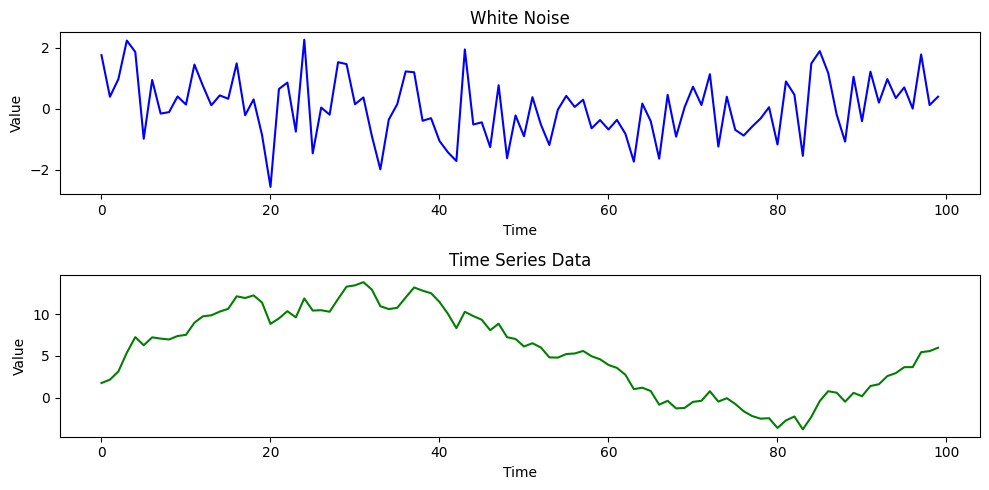

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(white_noise, color='blue')
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.subplot(2, 1, 2)
plt.plot(time_series_data, color='green')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [5]:
adf_statistic, adf_p_value = adf_test(time_series_data)
print('Augmented Dickey-Fuller Test:')
print('ADF Statistic:', adf_statistic)
print('p-value:', adf_p_value)


Augmented Dickey-Fuller Test:
ADF Statistic: -0.04878427948630821
p-value: -0.023762405904972805


In [6]:
kpss_statistic = kpss_test(time_series_data)
print('\nKwiatkowski–Phillips–Schmidt–Shin Test:')
print('KPSS Statistic:', kpss_statistic)


Kwiatkowski–Phillips–Schmidt–Shin Test:
KPSS Statistic: 71.74646566285517
